### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('3.10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [12]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

def generate_degrees(data, deg):
    
    return np.array([
          data**n for n in range(1, deg + 1)
    ]).T

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель

    дополнительно рисуем график
    """

    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = r2_score(data['y_train'], y_pred)
    print(" Ошибка" ,degree, error)
    return round(error, 3), y_pred
    
x = [0]   
for i in range(1,22):
    y, y_pred = train_polynomial(i, data)
    try:
        if x[-1:] < y:
            x.append(y)
        else:
            print(x[-1:],'Степень ', i)
            print(x[:])
            print(y)
            print('Y_PRED', y)
            break
            
    except DeprecationWarning:
        print()

 Ошибка 1 0.5194693682784115
 Ошибка 2 0.5334743428787219
 Ошибка 3 0.8884043369162162
 Ошибка 4 0.8954938957170193
 Ошибка 5 0.8955568441439692
 Ошибка 6 0.8993403708180594
 Ошибка 7 0.9004609754024411
 Ошибка 8 0.9086556247250689
 Ошибка 9 0.9088071215143488
[0.909] Степень  9
[0, 0.519, 0.533, 0.888, 0.895, 0.896, 0.899, 0.9, 0.909]
0.909
Y_PRED 0.909


**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

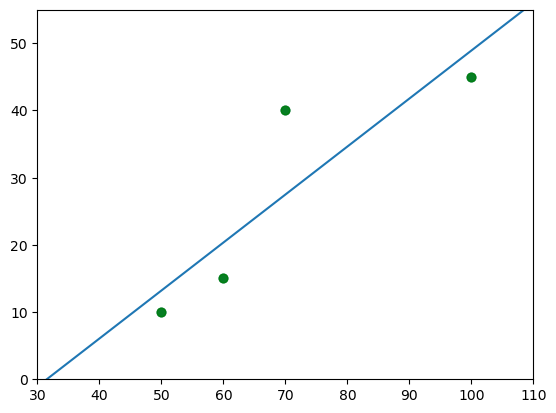

In [43]:
from numpy.linalg import inv

class CustomLinearReg:
    def __init__(self, X=None, Y=None, w=None, b=None):
        self.x= X
        self.y = Y
        self.w = w

    def fit(self, X, Y):
        x = np.array([[1,i] for i in X])
        XT = x.transpose().dot(x)
        XT_inv = inv(XT)
        y = np.array([[j]for j in Y])
        self.w = XT_inv.dot(x.T).dot(y)
        return self.w

    def predict(self, X):
        y_pred = self.w[0][0] + self.w[1][0]*X
        return y_pred
    
    
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]


reg = CustomLinearReg().fit(x_hw,y_hw)

X = np.array([[1,i] for i in x_hw])
Y = np.array([[j]for j in y_hw])
margin = 10
X_min = 30
X_max = X[:,1].max()+margin

# набор точек, чтобы нарисовать прямую
X_support = np.linspace(X_min, X_max, num=100)
# предсказания нашей модели
Y_model = reg[0][0] + reg[1][0]*X_support
plt.scatter(x_hw,y_hw)
plt.xlim(X_min, X_max)
plt.ylim(0, Y[:,0].max() + margin)
# рисуем исходные точки
plt.scatter(X[:,1], Y[:,0], 40, 'g', 'o', alpha=0.8)
# предсказания модели
plt.plot(X_support, Y_model)

moc = CustomLinearReg()
moc.fit(x_hw,y_hw)
moc.predict(2)

plt.show()

TypeError: list indices must be integers or slices, not tuple

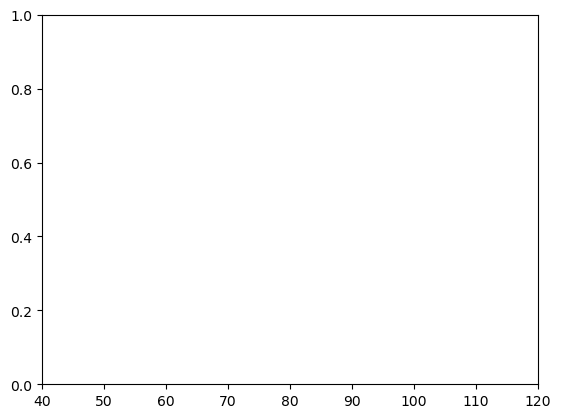

array([[10],
       [15],
       [40],
       [45]])

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [95]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np

boston_dataset =  fetch_california_housing()
x, y = pd.DataFrame(boston_dataset.data), pd.DataFrame(boston_dataset.target)
X_train, X_valid, y_train, y_valid = train_test_split(x,y, test_size=0.2, random_state=10)
mod = LinearRegression().fit(X_train,y_train)
y_pred = mod.predict(X_valid)
y_pred_train = mod.predict(X_train)
print('Валидация %.3f'%r2_score(y_valid, y_pred))
print('Обучающая %.3f'%r2_score(y_train, y_pred_train))

Валидация 0.601
Обучающая 0.607


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_valid)

mod2 = LinearRegression().fit(X_train,y_train)
y_pred2 = mod2.predict(X_valid)
y_pred_train2 = mod2.predict(X_train)
print('Валидация %.3f'%r2_score(y_valid, y_pred2))
print('Обучающая %.3f'%r2_score(y_train, y_pred_train2))

Валидация -4075.206
Обучающая 0.607
